In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import geopandas as gpd

# Extraction of Data

In [5]:
Business_account = pd.read_excel("../shared_data_read_only/Business Account.xlsx")
Consumer_price_index = pd.read_excel("../shared_data_read_only/consumer_price_index.xlsx")
Contacts = pd.read_excel("../shared_data_read_only/Contacts.xlsx")
Data_dictionary = pd.read_excel("../shared_data_read_only/Data dictionary.xlsx")
Invoice_and_opportunities = pd.read_excel("../shared_data_read_only/Invoice and Opportunities.xlsx")
Non_stock_items = pd.read_excel("../shared_data_read_only/Non-Stock Items.xlsx")
Items_and_opportunities = pd.read_excel("../shared_data_read_only/Items and Opportunities.xlsx")
Opportunities = pd.read_excel("../shared_data_read_only/Opportunities.xlsx")

# Business account and Opportunities analysis

In [6]:
Opportunities.head()

,Opportunity ID,Business Account,Contact ID,Estimated Close Date,Status,Stage,Probability,Estimated amount,Amount received,Difference,...,Theorical payment amount 3,Theorical payment date 4,Theorical payment amount 4,Theorical payment date 5,Theorical payment amount 5,Created On,Last Modified Date,Actual Close Date,Assignment Date,Branch ID
0,6387,C00037,35334.0,2023-11-27,New,Won,100,9000.0,NaN,-9000.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-11 10:59:07.310,2023-10-11 10:59:07.310,NaT,2023-10-11 10:58:16.137,SDLV
1,6386,C01254,36240.0,2023-10-11,New,Won,100,9000.0,NaN,-9000.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-11 10:55:50.773,2023-10-11 10:55:50.773,NaT,2023-10-11 10:53:26.857,SDLV
2,6385,C21512,47640.0,2023-10-11,New,Oral agreement,80,140.0,NaN,-140.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-11 08:53:52.533,2023-10-11 08:54:37.860,NaT,2023-10-11 08:52:52.257,SDLV
3,6384,C21509,47636.0,2023-10-11,New,Oral agreement,80,350.0,NaN,-350.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-11 08:42:41.140,2023-10-11 08:42:41.140,NaT,2023-10-11 08:41:27.513,SDLV
4,6383,C21508,47635.0,2023-10-10,New,Oral agreement,80,120.0,NaN,-120.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-10 15:54:31.827,2023-10-10 15:56:12.527,NaT,2023-10-10 15:53:17.550,SDLV


In [7]:
Business_account.head()

,Business Account,Customer Status,Type,Partner type,Class,Class Name,Activity sector,Parent Business Account,Owner Name,Follow-up with,Postal Code,City,State,Country ID,Country Name,Created On,Last Modified On
0,C00001,Active,Customer,Partner,02FONDA,Foundation,"HEALTH - SOCIAL - Social, Associations, Founda...",NaN,2.0,NaN,69009,LYON,NaN,FR,France,2021-02-02 15:35:10.183,2023-01-04 15:51:00.977
1,C00002,Active,Customer,NaN,NaN,NaN,NaN,NaN,13.0,NaN,69005,Lyon,NaN,FR,France,2021-02-02 15:35:11.213,2021-03-24 16:25:28.393
2,C00003,Active,Customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Non renseigné,NaN,FR,France,2021-02-02 15:35:11.457,2021-02-18 09:58:03.387
3,C00004,Active,Customer,Partner,01SIEGE,Headquarters,"BUSINESS ADMINISTRATION - Consulting, Audit, A...",NaN,12.0,NaN,75008,PARIS,NaN,FR,France,2021-02-02 15:35:11.770,2023-08-03 11:08:03.953
4,C00005,Active,Customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Non renseigné,NaN,FR,France,2021-02-02 15:35:12.013,2021-02-18 09:58:03.620


In [8]:
col_ba = set(Business_account.columns)
col_ba

{'Activity sector',
 'Business Account',
 'City',
 'Class',
 'Class Name',
 'Country ID',
 'Country Name',
 'Created On',
 'Customer Status',
 'Follow-up with',
 'Last Modified On',
 'Owner Name',
 'Parent Business Account',
 'Partner type',
 'Postal Code',
 'State',
 'Type'}

In [9]:
col_op = set(Opportunities.columns)
col_op

{'Action financée',
 'Actual Close Date',
 'Agreement',
 'Agreement expiry date',
 'Amount received',
 'Assignment Date',
 'Branch ID',
 'Business Account',
 'Campaign Name',
 'Class',
 'Class ID',
 'Contact ID',
 'Created On',
 'Deadline for submission of interim report',
 'Difference',
 'Duration of agreement (months)',
 'Estimated Close Date',
 'Estimated amount',
 'Final report deadline',
 'Follow-up with',
 'Last Modified Date',
 'Opportunity ID',
 'Owner Name',
 'Probability',
 'Programme financé',
 'Signature date of the agreement',
 'Source',
 'Source Campaign',
 'Stage',
 'Status',
 'Theorical payment amount 1',
 'Theorical payment amount 2',
 'Theorical payment amount 3',
 'Theorical payment amount 4',
 'Theorical payment amount 5',
 'Theorical payment date 1',
 'Theorical payment date 2',
 'Theorical payment date 3',
 'Theorical payment date 4',
 'Theorical payment date 5',
 'Type de contrat',
 'Type de financement',
 'Zone SDLV'}

In [10]:
intersection = list(col_op & col_ba)
intersection

['Business Account', 'Created On', 'Follow-up with', 'Owner Name', 'Class']

In [11]:
op_ba = Opportunities.merge(Business_account, on='Business Account', how='left')
op_ba

,Opportunity ID,Business Account,Contact ID,Estimated Close Date,Status,Stage,Probability,Estimated amount,Amount received,Difference,...,Parent Business Account,Owner Name_y,Follow-up with_y,Postal Code,City,State,Country ID,Country Name,Created On_y,Last Modified On
0,6387,C00037,35334.0,2023-11-27,New,Won,100,9000.0,NaN,-9000.0,...,NaN,29.0,25.0,69001,LYON,NaN,FR,France,2021-02-02 15:35:25.690,2023-10-10 17:02:23.207
1,6386,C01254,36240.0,2023-10-11,New,Won,100,9000.0,NaN,-9000.0,...,NaN,15.0,25.0,69007,LYON,NaN,FR,France,2021-03-08 14:42:00.137,2023-10-10 17:52:08.003
2,6385,C21512,47640.0,2023-10-11,New,Oral agreement,80,140.0,NaN,-140.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
3,6384,C21509,47636.0,2023-10-11,New,Oral agreement,80,350.0,NaN,-350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
4,6383,C21508,47635.0,2023-10-10,New,Oral agreement,80,120.0,NaN,-120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,5,C00036,NaN,2020-01-01,Won,Won,100,1059.0,NaN,-1059.0,...,NaN,26.0,19.0,75382,PARIS CEDEX 08,NaN,FR,France,2021-02-02 15:35:25.500,2023-08-04 09:10:12.213
5982,4,C00024,NaN,2020-01-01,Won,Won,200,7500.0,7500.0,0.0,...,NaN,28.0,25.0,75007,PARIS,NaN,FR,France,2021-02-02 15:35:21.780,2023-09-26 12:06:19.703
5983,3,C00011,NaN,2020-01-01,Won,Won,100,35000.0,NaN,-35000.0,...,NaN,37.0,6.0,92445,ISSY-LES-MOULINEAUX,NaN,FR,France,2021-02-02 15:35:15.180,2023-09-27 15:06:45.433
5984,2,C00331,NaN,2020-01-01,Won,Won,100,20000.0,NaN,-20000.0,...,NaN,29.0,NaN,84200,CARPENTRAS,NaN,FR,France,2021-02-02 15:36:35.497,2023-07-19 10:52:05.340


In [12]:
Opportunities.shape

(5986, 43)

In [13]:
Business_account.shape

(3483, 17)

In [14]:
op_ba.shape

(5986, 59)

In [15]:
op_ba_won = op_ba.loc[(op_ba['Stage'] == 'Won') & (op_ba['Status'] == 'Won')]
display(op_ba_won)

,Opportunity ID,Business Account,Contact ID,Estimated Close Date,Status,Stage,Probability,Estimated amount,Amount received,Difference,...,Parent Business Account,Owner Name_y,Follow-up with_y,Postal Code,City,State,Country ID,Country Name,Created On_y,Last Modified On
22,6365,C18115,46338.0,2023-10-25,Won,Won,200,150.0,NaN,-150.0,...,NaN,24.0,NaN,69009,LYON,NaN,FR,France,2023-04-11 16:21:46.003,2023-04-17 11:24:20.093
49,6338,C00366,37931.0,2023-11-15,Won,Won,100,756.0,NaN,-756.0,...,NaN,29.0,13.0,69009,LYON,NaN,FR,France,2021-02-02 15:36:42.337,2023-09-25 11:50:48.430
106,6281,C04952,47602.0,2023-11-24,Won,Won,100,455.0,NaN,-455.0,...,NaN,24.0,NaN,69009,Lyon,NaN,FR,France,2021-10-12 14:28:46.853,2023-01-25 11:44:10.757
212,6174,C00094,47513.0,2023-11-27,Won,Won,200,9000.0,9000.0,0.0,...,NaN,15.0,25.0,69280,MARCY L ETOILE,NaN,FR,France,2021-02-02 15:35:38.463,2023-09-11 11:27:24.170
225,6161,C03977,39937.0,2023-11-10,Won,Won,100,2024.7,NaN,-2024.7,...,NaN,24.0,NaN,01600,REYRIEUX,NaN,FR,France,2021-07-21 14:13:33.810,2021-09-29 11:40:43.960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,5,C00036,NaN,2020-01-01,Won,Won,100,1059.0,NaN,-1059.0,...,NaN,26.0,19.0,75382,PARIS CEDEX 08,NaN,FR,France,2021-02-02 15:35:25.500,2023-08-04 09:10:12.213
5982,4,C00024,NaN,2020-01-01,Won,Won,200,7500.0,7500.0,0.0,...,NaN,28.0,25.0,75007,PARIS,NaN,FR,France,2021-02-02 15:35:21.780,2023-09-26 12:06:19.703
5983,3,C00011,NaN,2020-01-01,Won,Won,100,35000.0,NaN,-35000.0,...,NaN,37.0,6.0,92445,ISSY-LES-MOULINEAUX,NaN,FR,France,2021-02-02 15:35:15.180,2023-09-27 15:06:45.433
5984,2,C00331,NaN,2020-01-01,Won,Won,100,20000.0,NaN,-20000.0,...,NaN,29.0,NaN,84200,CARPENTRAS,NaN,FR,France,2021-02-02 15:36:35.497,2023-07-19 10:52:05.340


* Percentage of winning opportunities : 58,35%

* The number of different business account with won opportunities

In [16]:
nb_business = op_ba_won['Business Account'].nunique()
display(nb_business)

1191

In [17]:
op_ba_won['Amount received']

22         NaN
49         NaN
106        NaN
212     9000.0
225        NaN
         ...  
5981       NaN
5982    7500.0
5983       NaN
5984       NaN
5985       NaN
Name: Amount received, Length: 3493, dtype: float64

In [34]:
op_ba_won.describe()['Estimated amount']

count    3.493000e+03
mean     1.481972e+04
std      6.323435e+04
min      0.000000e+00
25%      1.300000e+03
50%      4.589000e+03
75%      1.000000e+04
max      1.575000e+06
Name: Estimated amount, dtype: float64

### Business account : best ones

In [19]:
result = op_ba.groupby('Business Account').apply(
    lambda group: ((group['Status'] == 'Won') & (group['Stage'] == 'Won')).mean() * 100
)

In [20]:
result = result.sort_values(ascending=False)
result

Business Account
C01409    100.0
C10545    100.0
C18479    100.0
C01083    100.0
C11097    100.0
          ...  
C06954      0.0
C06955      0.0
C06990      0.0
C07156      0.0
C21537      0.0
Length: 2063, dtype: float64

* We want to plot the sector of activity for each of the 'best' business account

In [21]:
filtered_result = result[result > 75]

* Proportion of partners amongst the best business account

In [22]:
dic = {}
for (ba, partner_type) in op_ba[['Business Account', 'Partner type']].values:
    dic[ba] = partner_type
    

partners = pd.Series(filtered_result.index).apply(lambda x : dic[x] == 'Partner')
partners

0       True
1       True
2      False
3       True
4       True
       ...  
791     True
792     True
793    False
794     True
795    False
Name: Business Account, Length: 796, dtype: bool

In [23]:
partners_result = filtered_result[partners.values]
non_partners_result = filtered_result[~partners.values]

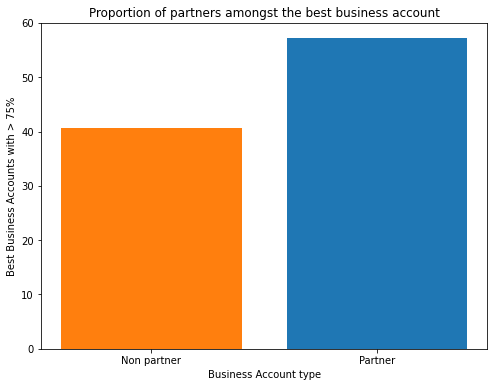

In [24]:
# Plot the filtered data
plt.figure(figsize=(8, 6))
plt.bar(1, sum(partners_result)/len(filtered_result))
plt.bar(0, sum(non_partners_result)/len(filtered_result))
plt.xticks([0, 1], ['Non partner', 'Partner'])
plt.xlabel('Business Account type')
plt.ylabel('Best Business Accounts with > 75%')
plt.title('Proportion of partners amongst the best business account')
plt.show()

## Cities that are the most interesting

In [25]:
cities = op_ba['Postal Code'].unique()

In [26]:
s = pd.Series(cities)

s = s.str.slice(0, 2)
s = s.unique()

In [27]:
print(s)

['69' nan '92' '75' '74' '93' '94' '59' '66' '78' '13' '00' '38' '42' '10'
 'BA' '63' 'KT' '01' '73' '0' '12' 'NY' '95' '91' '26' 'MA' 'SW' '80' '62'
 '72' 'EC' '77' '98' '31' '33' '76' 'AT' 'IL' '67' '60' '84' '20' '34'
 '45' '68' '83' 'NJ' '89' '55' '56' '22' '06' '44' '79' '35' 'GA' '08'
 '61' '16' '14' '41' '07' '11' '02' 'WC' '18' '54' '87' '88' '50' 'L-'
 '64' '57' '21' '97' '04' '40' '43' '17' '19']


In [28]:
df = pd.DataFrame({'Department': s})

# Count the occurrences of each department code
department_counts = df['Department'].value_counts()

# Load the shapefile for French departments
shapefile = 'path_to_department_shapefile.shp'
gdf = gpd.read_file(shapefile)

# Merge the department counts with the shapefile
gdf = gdf.merge(department_counts, left_on='department_code_column', right_index=True, how='left')

# Plot the map
gdf.plot(column='Department', legend=True, cmap='YlOrRd', figsize=(10, 8))
plt.title('Number of Elements in Each French Department')
plt.show()

DriverError: path_to_department_shapefile.shp: No such file or directory

In [36]:
op_ba_amount = op_ba['Estimated amount']
op_ba_amount

0        9000.0
1        9000.0
2         140.0
3         350.0
4         120.0
         ...   
5981     1059.0
5982     7500.0
5983    35000.0
5984    20000.0
5985    10000.0
Name: Estimated amount, Length: 5986, dtype: float64